In [8]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
lst= ['r','s','p']
dataset=[]
dataset2=[]
count= 0
while count<1000:
    dataset.append(random.choice(lst))
    dataset2.append(random.choice(lst))
    count+=1
final= pd.DataFrame({'User1':dataset,
                    'User2': dataset2})
import csv

final.to_csv("rps_dataset.csv", index=False)


    



In [9]:
df= pd.read_csv('rps_dataset.csv')
df.head()

,User1,User2
0,r,r
1,r,r
2,p,r
3,r,s
4,s,p


In [30]:
result = []

for col1, col2 in zip(df['User1'], df['User2']):
    if ((col1 == 'r') and (col2 == 's')) or \
       ((col1 == 'p') and (col2 == 'r')) or \
       ((col1 == 's') and (col2 == 'p')):
        result.append('U1')  # User1 wins
    elif ((col1 == 's') and (col2 == 'r')) or \
         ((col1 == 'r') and (col2 == 'p')) or \
         ((col1 == 'p') and (col2 == 's')):
        result.append('U2')  # User2 wins
    else:
        result.append('Draw')  # Same move

df['Result'] = result
df.head()


,User1,User2,Result,Repeat,U2_last
0,r,r,Draw,False,None
1,r,r,Draw,True,r
2,p,r,U1,False,r
3,r,s,U1,False,r
4,s,p,U1,False,s


C:\Users\mayan\AppData\Local\Temp\ipykernel_9992\2543833764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data= df, palette= 'coolwarm' )


<Axes: xlabel='Result', ylabel='count'>

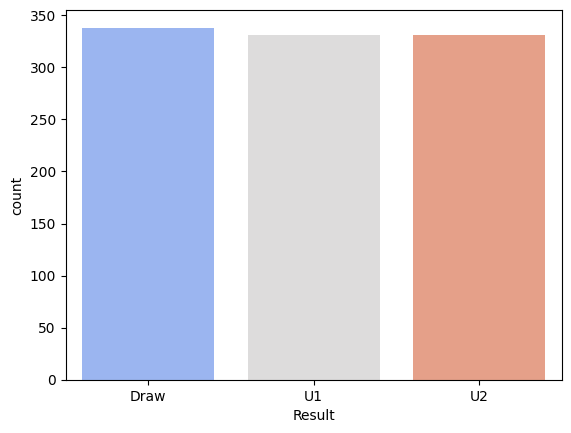

In [31]:
sns.countplot(x='Result', data= df, palette= 'coolwarm' )

In [32]:
df['Result'].value_counts()

Result
Draw    338
U1      331
U2      331
Name: count, dtype: int64

In [33]:
encoded_df= pd.get_dummies(df, columns=['User1', 'User2'], drop_first=True)
req_columns=["User1_r","User1_s","User2_r","User2_s"]
encoded_df=encoded_df[req_columns].astype(int)
encoded_df['Result']= df["Result"]
encoded_df['Result']= encoded_df['Result'].map({'U1': 0, 'U2':1, 'Draw':2})
encoded_df

,User1_r,User1_s,User2_r,User2_s,Result
0,1,0,1,0,2
1,1,0,1,0,2
2,0,0,1,0,0
3,1,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
995,0,1,0,0,0
996,0,1,0,1,2
997,1,0,1,0,2
998,0,0,1,0,0


In [34]:
X= encoded_df['Result']
y= encoded_df.drop(columns=['Result'])

In [35]:
df['User1'].value_counts()

User1
p    352
s    335
r    313
Name: count, dtype: int64

In [36]:
df['User2'].value_counts()

User2
p    337
s    332
r    331
Name: count, dtype: int64

In [37]:
pd.crosstab(df['User1'], df['User2'])

User2,p,r,s
User1,,,
p,123,112,117
r,101,106,106
s,113,113,109


<Axes: xlabel='User2', ylabel='User1'>

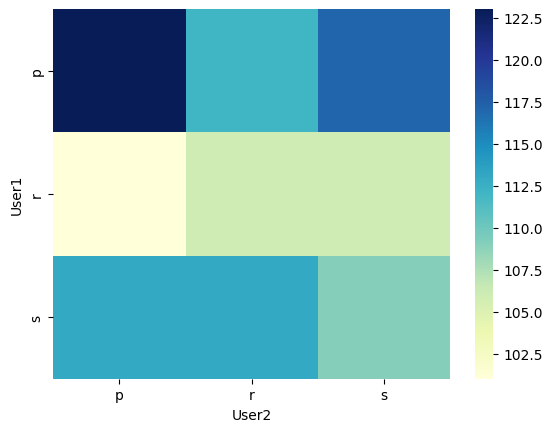

In [38]:
sns.heatmap(cross_tab, cmap='YlGnBu')

In [39]:
df['Repeat'] = df['User2'] == df['User2'].shift(1)
repeat_rate = df['Repeat'].mean()
print(f"User1 repeated their last move {repeat_rate * 100:.2f}% of the time")


User1 repeated their last move 31.40% of the time


In [40]:
df['Repeat'] = df['User1'] == df['User1'].shift(1)
repeat_rate = df['Repeat'].mean()
print(f"User1 repeated their last move {repeat_rate * 100:.2f}% of the time")


User1 repeated their last move 34.00% of the time


In [41]:
df

,User1,User2,Result,Repeat,U2_last
0,r,r,Draw,False,None
1,r,r,Draw,True,r
2,p,r,U1,False,r
3,r,s,U1,False,r
4,s,p,U1,False,s
...,...,...,...,...,...
995,s,p,U1,False,r
996,s,s,Draw,True,p
997,r,r,Draw,False,s
998,p,r,U1,False,r


In [42]:
df['U2_last']= df['User2'].shift(1)
response_pattern= pd.crosstab(df['U2_last'], df['User1'])
response_pattern

User1,p,r,s
U2_last,,,
p,123,93,121
r,110,111,110
s,119,108,104


In [43]:
df

,User1,User2,Result,Repeat,U2_last
0,r,r,Draw,False,None
1,r,r,Draw,True,r
2,p,r,U1,False,r
3,r,s,U1,False,r
4,s,p,U1,False,s
...,...,...,...,...,...
995,s,p,U1,False,r
996,s,s,Draw,True,p
997,r,r,Draw,False,s
998,p,r,U1,False,r
